# About Dataset
### (WELFake) is a dataset of 72,134 news articles with 35,028 real and 37,106 fake news. For this, authors merged four popular news datasets (i.e. Kaggle, McIntire, Reuters, BuzzFeed Political) to prevent over-fitting of classifiers and to provide more text data for better ML training.

###  Dataset contains four columns: Serial number (starting from 0); Title (about the text news heading); Text (about the news content); and Label (0 = fake and 1 = real).

### There are 78098 data entries in csv file out of which only 72134 entries are accessed as per the data frame.

### Published in:
### IEEE Transactions on Computational Social Systems: pp. 1-13 (doi: 10.1109/TCSS.2021.3068519).



In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('WELFake.csv')
df

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [28]:
X=df.drop(columns=['Unnamed: 0','label'],inplace=True)

KeyError: "['Unnamed: 0', 'label'] not found in axis"

In [31]:
X

In [17]:
df['text'][2]

' Now, most of the demonstrators gathered last night were exercising their constitutional and protected right to peaceful protest in order to raise issues and create change.    Loretta Lynch aka Eric Holder in a skirt'

In [5]:
df.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [11]:
df.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [12]:
df = df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(63678, 3)

In [17]:
df['label'].value_counts()

0    34791
1    28887
Name: label, dtype: int64

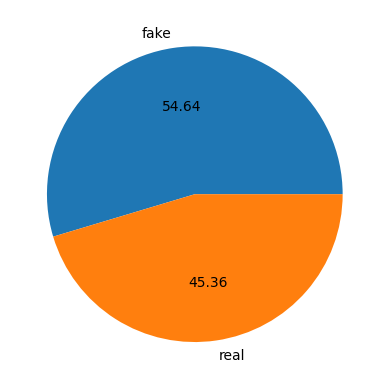

In [22]:
plt.pie(df['label'].value_counts(),labels=['fake','real'],autopct='%0.2f')
plt.show()

In [23]:
# DATA IS SOMEWHAT BALANCED 
# MORE NUMBER OF FAKE NEWS

In [24]:
import nltk

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
from nltk.corpus import stopwords
sw=stopwords.words('english')
import string
for i in string.ascii_lowercase:
    sw.append(i)

In [52]:

# Stemming is a process that stems or removes last few characters from a word, often leading to incorrect meanings and spelling.
# Lemmatization considers the context and converts the word to its meaningful base form, which is called Lemma.
# For instance, stemming the word 'Caring' would return 'Car'


In [56]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
ps=PorterStemmer()
wordnet=WordNetLemmatizer()
ps.stem('caring')

'care'

In [57]:
corpus=[]
for i in range(len(X['title'])):
    title = re.sub('[^a-zA-Z]', ' ', str(X['title'][i])).lower().split()
    title = [wordnet.lemmatize(word) for word in title if not word in set(sw)]
    title = ' '.join(title)
    corpus.append(title)

NameError: name 'X' is not defined